In [23]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
spam = fetch_openml('spambase')

In [3]:
spam['frame']

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,88.0,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,14.0,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,118.0,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,78.0,0


In [4]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [5]:
# sns.pairplot(spam['frame'].iloc(1)[:5])
def nonzero_prop(x):
    return (x!=0).mean()

spam['frame'].agg(['max', nonzero_prop]).T

,max,nonzero_prop
word_freq_make,4.540,0.228863
word_freq_address,14.280,0.195175
word_freq_all,5.100,0.410346
word_freq_3d,42.810,0.010215
word_freq_our,10.000,0.379917
word_freq_over,5.880,0.217127
word_freq_remove,7.270,0.175397
word_freq_internet,11.110,0.179092
word_freq_order,5.260,0.168007
word_freq_mail,18.180,0.282982


In [30]:
train_df,test_df = train_test_split(spam['frame'], test_size=0.2, shuffle=True, random_state=1)

def Xyspam(df):
    return df.drop(columns=['class']), df['class']


def print_report(model, X, y):
    y_pred = model.predict(X)
    cm = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y, labels=model.classes_), 
                      columns=model.classes_, index=model.classes_)
    cm.index.name = 'True'
    cm.columns.name = 'Predicted'
    cr = classification_report(y_pred=y_pred, y_true=y)
    print(cm)
    print(cr)
    return (cm, cr)

def plot_decision(model, X, y, r=(-np.inf, np.inf)):
    delta = model.decision_function(X)
    r = (max(r[0],delta.min()), min(r[1],delta.max()))
    n =len(model.classes_)
    for i, c in enumerate(model.classes_):
        idx = y==c
        plt.subplot(n,1,i+1)
        sns.histplot(x = delta[idx])
        plt.xlim(*r)
    plt.show()


In [28]:
logistic = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='none', solver='newton-cg'))
logistic.fit(*Xyspam(train_df))

cm, cr = print_report(logistic, *Xyspam(test_df))

Predicted    0    1
True               
0          541   23
1           42  315
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       564
           1       0.93      0.88      0.91       357

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



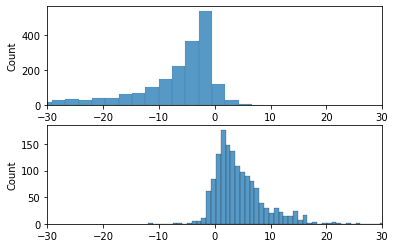

In [33]:
plot_decision(logistic, *Xyspam(train_df), r=(-30,30))

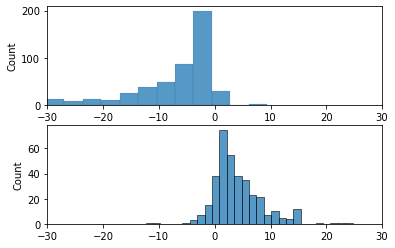

In [34]:
plot_decision(logistic, *Xyspam(test_df), r=(-30,30))

In [8]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=16, shuffle=True)


In [9]:
logistic_l2_cv = make_pipeline(StandardScaler(), 
                               LogisticRegressionCV(Cs=[0.1, 1, 2.5, 5, 7.5, 10, 15, 20, 50, 100, 1000], 
                                                    # #[0.1,1,5,10,50,100], 
                                                    penalty='l2', 
                                                    cv=cv, 
                                                    solver = 'liblinear',
                                                    refit=True)).fit(*Xyspam(train_df)) #spam['frame']))

In [10]:
print(logistic_l2_cv[1].C_)

[10.]


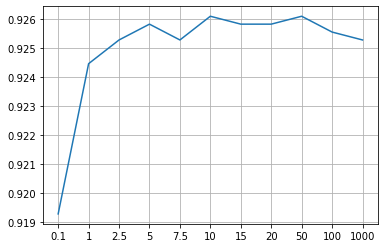

In [11]:
plt.plot(logistic_l2_cv[1].scores_['1'].mean(axis=0)) #.T) #.mean(axis=0))
plt.grid()
plt.xticks(*zip(*enumerate(logistic_l2_cv[1].Cs)))
plt.show()

In [12]:
#logistic = make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2', C=10, solver='newton-cg'))
#logistic.fit(*Xyspam(train_df))

print('logistic regression without penalty')
print(cm)
print('logistic regression with l2 penalty (cv selected)')
cm_l2, cr_l2 = print_report(logistic_l2_cv, *Xyspam(test_df))


logistic regression without penalty
Predicted    0    1
True               
0          541   23
1           42  315
logistic regression with l2 penalty (cv selected)
Predicted    0    1
True               
0          541   23
1           39  318
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       564
           1       0.93      0.89      0.91       357

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



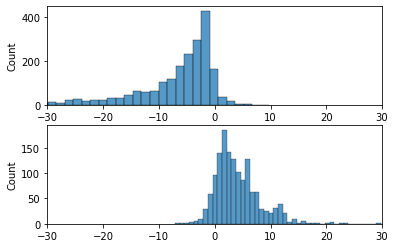

In [36]:
plot_decision(logistic_l2_cv, *Xyspam(train_df), r=(-30,30))

In [13]:
logistic_l1_cv = make_pipeline(StandardScaler(), 
                               LogisticRegressionCV(Cs=[0.1, 1, 2.5, 5, 7.5, 10, 15, 20, 50, 100, 1000], # #[0.1,1,5,10,50,100], 
                                                    penalty='l1', 
                                                    cv=cv, 
                                                    solver = 'liblinear',
                                                    refit=True)).fit(*Xyspam(train_df)) #spam['frame']))

l1_best_C=logistic_l1_cv[1].C_
print(l1_best_C)

[5.]


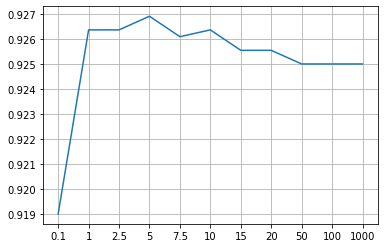

number of zero coefficients
C           0.1     1.0     2.5     5.0     7.5     10.0    15.0    20.0    \
Fold index                                                                   
0                7       3       0       0       0       0       0       0   
1                7       3       3       1       1       1       0       0   
2                8       3       1       0       0       0       0       0   
3               11       1       0       0       0       0       0       0   
4                6       2       0       0       0       0       0       0   

C           50.0    100.0   1000.0  
Fold index                          
0                0       0       0  
1                0       0       0  
2                0       0       0  
3                0       0       0  
4                0       0       0  
number of zero coefficients of the refitted model with the best C:  0


In [14]:
log_l1_cv = logistic_l1_cv[1]
plt.plot(log_l1_cv.scores_['1'].mean(axis=0)) #.T) #.mean(axis=0))
plt.grid()
plt.xticks(*zip(*enumerate(log_l1_cv.Cs)))
plt.show()
print('number of zero coefficients')
nonzero_coef= pd.DataFrame((log_l1_cv.coefs_paths_['1']==0).sum(axis=-1), 
                            columns=log_l1_cv.Cs)
nonzero_coef.index.name = 'Fold index'
nonzero_coef.columns.name = 'C'
print(nonzero_coef.to_string(line_width=80))

coef_zero = logistic_l1_cv.feature_names_in_[logistic_l1_cv[1].coef_[0]==0]
print('number of zero coefficients of the refitted model with the best C: ', len(coef_zero))

In [15]:
#logistic = make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l1', C=5, solver='liblinear'))
#logistic.fit(*Xyspam(train_df))
print('logistic regression without regularization')
print(cm)
print('-'*50)
print('logistic regression with l2 regularization')
print(cm_l2)
print('-'*50)
print('logistic regression with l1 regularization')
cm_l1, cr_l1 = print_report(logistic_l1_cv, *Xyspam(test_df))


logistic regression without regularization
Predicted    0    1
True               
0          541   23
1           42  315
--------------------------------------------------
logistic regression with l2 regularization
Predicted    0    1
True               
0          541   23
1           39  318
--------------------------------------------------
logistic regression with l1 regularization
Predicted    0    1
True               
0          542   22
1           39  318
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       564
           1       0.94      0.89      0.91       357

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



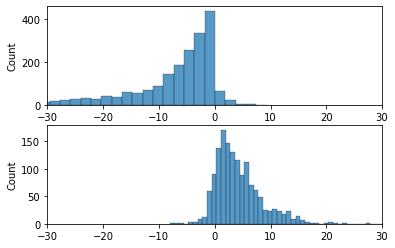

In [37]:
plot_decision(logistic_l1_cv, *Xyspam(train_df), r=(-30,30))

In [16]:
knn = make_pipeline(StandardScaler(), KNN(n_neighbors=11)).fit(*Xyspam(train_df))

cm_11, cr_11 = print_report(knn, *Xyspam(test_df))


Predicted    0    1
True               
0          530   34
1           56  301
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       564
           1       0.90      0.84      0.87       357

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921



In [17]:
knn = make_pipeline(StandardScaler(), KNN(n_neighbors=51)).fit(*Xyspam(train_df))

cm_51, cr_51 = print_report(knn, *Xyspam(test_df))


Predicted    0    1
True               
0          543   21
1           77  280
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       564
           1       0.93      0.78      0.85       357

    accuracy                           0.89       921
   macro avg       0.90      0.87      0.88       921
weighted avg       0.90      0.89      0.89       921



In [18]:
lda = make_pipeline(LDA()).fit(*Xyspam(train_df))

cm_lda,cr_lda = print_report(lda, *Xyspam(test_df))

Predicted    0    1
True               
0          548   16
1           79  278
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       564
           1       0.95      0.78      0.85       357

    accuracy                           0.90       921
   macro avg       0.91      0.88      0.89       921
weighted avg       0.90      0.90      0.89       921



In [19]:
qda = make_pipeline(QDA()).fit(*Xyspam(train_df))
cm_qda,cr_qda = print_report(qda, *Xyspam(test_df))

Predicted    0    1
True               
0          397  167
1           19  338
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       564
           1       0.67      0.95      0.78       357

    accuracy                           0.80       921
   macro avg       0.81      0.83      0.80       921
weighted avg       0.84      0.80      0.80       921



/home/prokaj/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:873: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [20]:
gnb = GaussianNB().fit(*Xyspam(train_df))

cm_nb, cr_nb = print_report(gnb, *Xyspam(test_df))

Predicted    0    1
True               
0          416  148
1           21  336
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       564
           1       0.69      0.94      0.80       357

    accuracy                           0.82       921
   macro avg       0.82      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

